## Linear Regresion Assignment


## <span style='color:orange'> Problem Statement </span>
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


### <span style='color:orange'> Business Goal: </span>
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


### <span style='color:orange'> Data Preparation: </span>

You can observe in the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case (Check the data dictionary and think why). So, it is advisable to convert such feature values into categorical string values before proceeding with model building. Please refer the data dictionary to get a better understanding of all the independent variables.
 
You might notice the column 'yr' with two values 0 and 1 indicating the years 2018 and 2019 respectively. At the first instinct, you might think it is a good idea to drop this column as it only has two values so it might not be a value-add to the model. But in reality, since these bike-sharing systems are slowly gaining popularity, the demand for these bikes is increasing every year proving that the column 'yr' might be a good variable for prediction. So think twice before dropping it. 
 

### <span style='color:orange'> Model Building: </span>

In the dataset provided, you will notice that there are three columns named 'casual', 'registered', and 'cnt'. The variable 'casual' indicates the number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. The model should be built taking this 'cnt' as the target variable.

In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


## Step 1: Reading and Understanding the Data

In [392]:
day_df=pd.read_csv('/Users/swethag/Desktop/Upgrad_Data Science/Python Docs/Self Study From Upgrad/Course_2/Linear Regression/Assignment/day.csv')

In [91]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [92]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [93]:
# Checking for any null values present in Dataframe
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [94]:
day_df.shape

(730, 16)

In [95]:
# Checking for any null values present in Dataframe
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [96]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Data - Pre Processing 

In [393]:
## Dropping the columns which are not required for analysis 

day_df.drop(['instant','dteday','casual','registered'],axis=1, inplace=True)
day_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [24]:
# Checking how many unique values present for each columns
day_df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

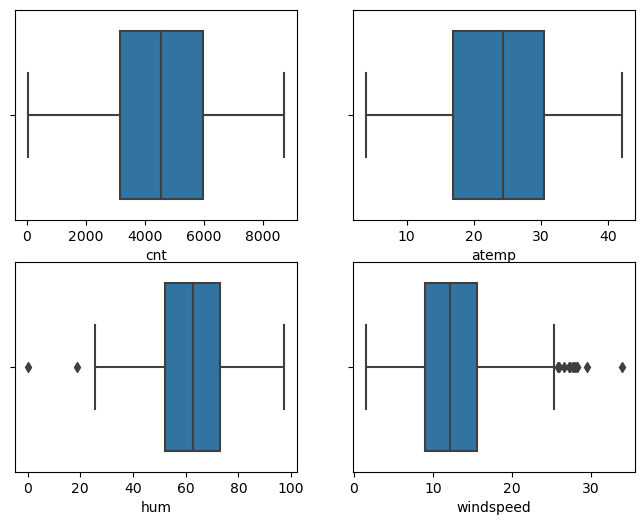

In [45]:
## Plotting Box plot for independent continous variables 
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
sns.boxplot(x='cnt',data=day_df)

plt.subplot(2,2,2)
sns.boxplot(x='atemp',data=day_df)

plt.subplot(2,2,3)
sns.boxplot(x='hum',data=day_df)

plt.subplot(2,2,4)
sns.boxplot(x='windspeed',data=day_df)
plt.show()

## From the below box plot we can conclude that there are no outliers present for these variables  

## Exploratory Data Analysis 


In [394]:
## Mapping all non-binary categorical columns to their Orginal value 


day_df.season = day_df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
day_df.mnth = day_df.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
day_df.weekday = day_df.weekday.map({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
day_df.weathersit=day_df.weathersit.map({1:'good',2:'moderate',3:'bad',4:'severe'})


In [209]:
day_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600


## Visualizing the data 

<Figure size 3000x1200 with 0 Axes>

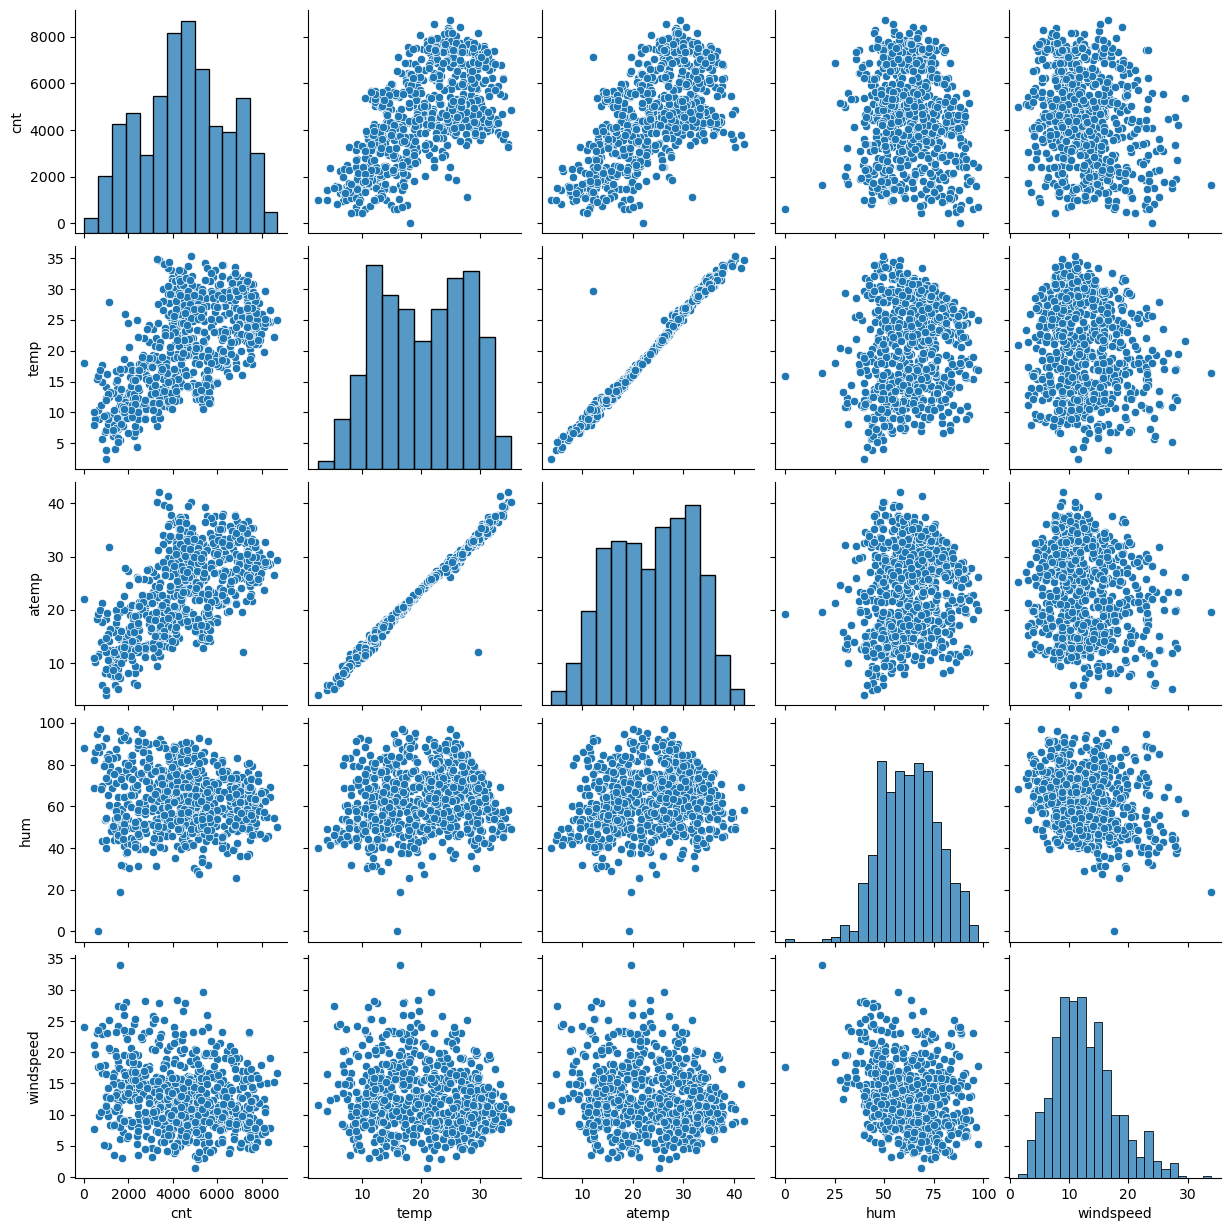

In [395]:
## Now, drawing pair plots to check Linear Relationship for continous variables 

plt.figure(figsize=(30,12))
sns.pairplot(vars=['cnt', 'temp', 'atemp', 'hum','windspeed'],data=day_df)
plt.show()

<Figure size 3000x1200 with 0 Axes>

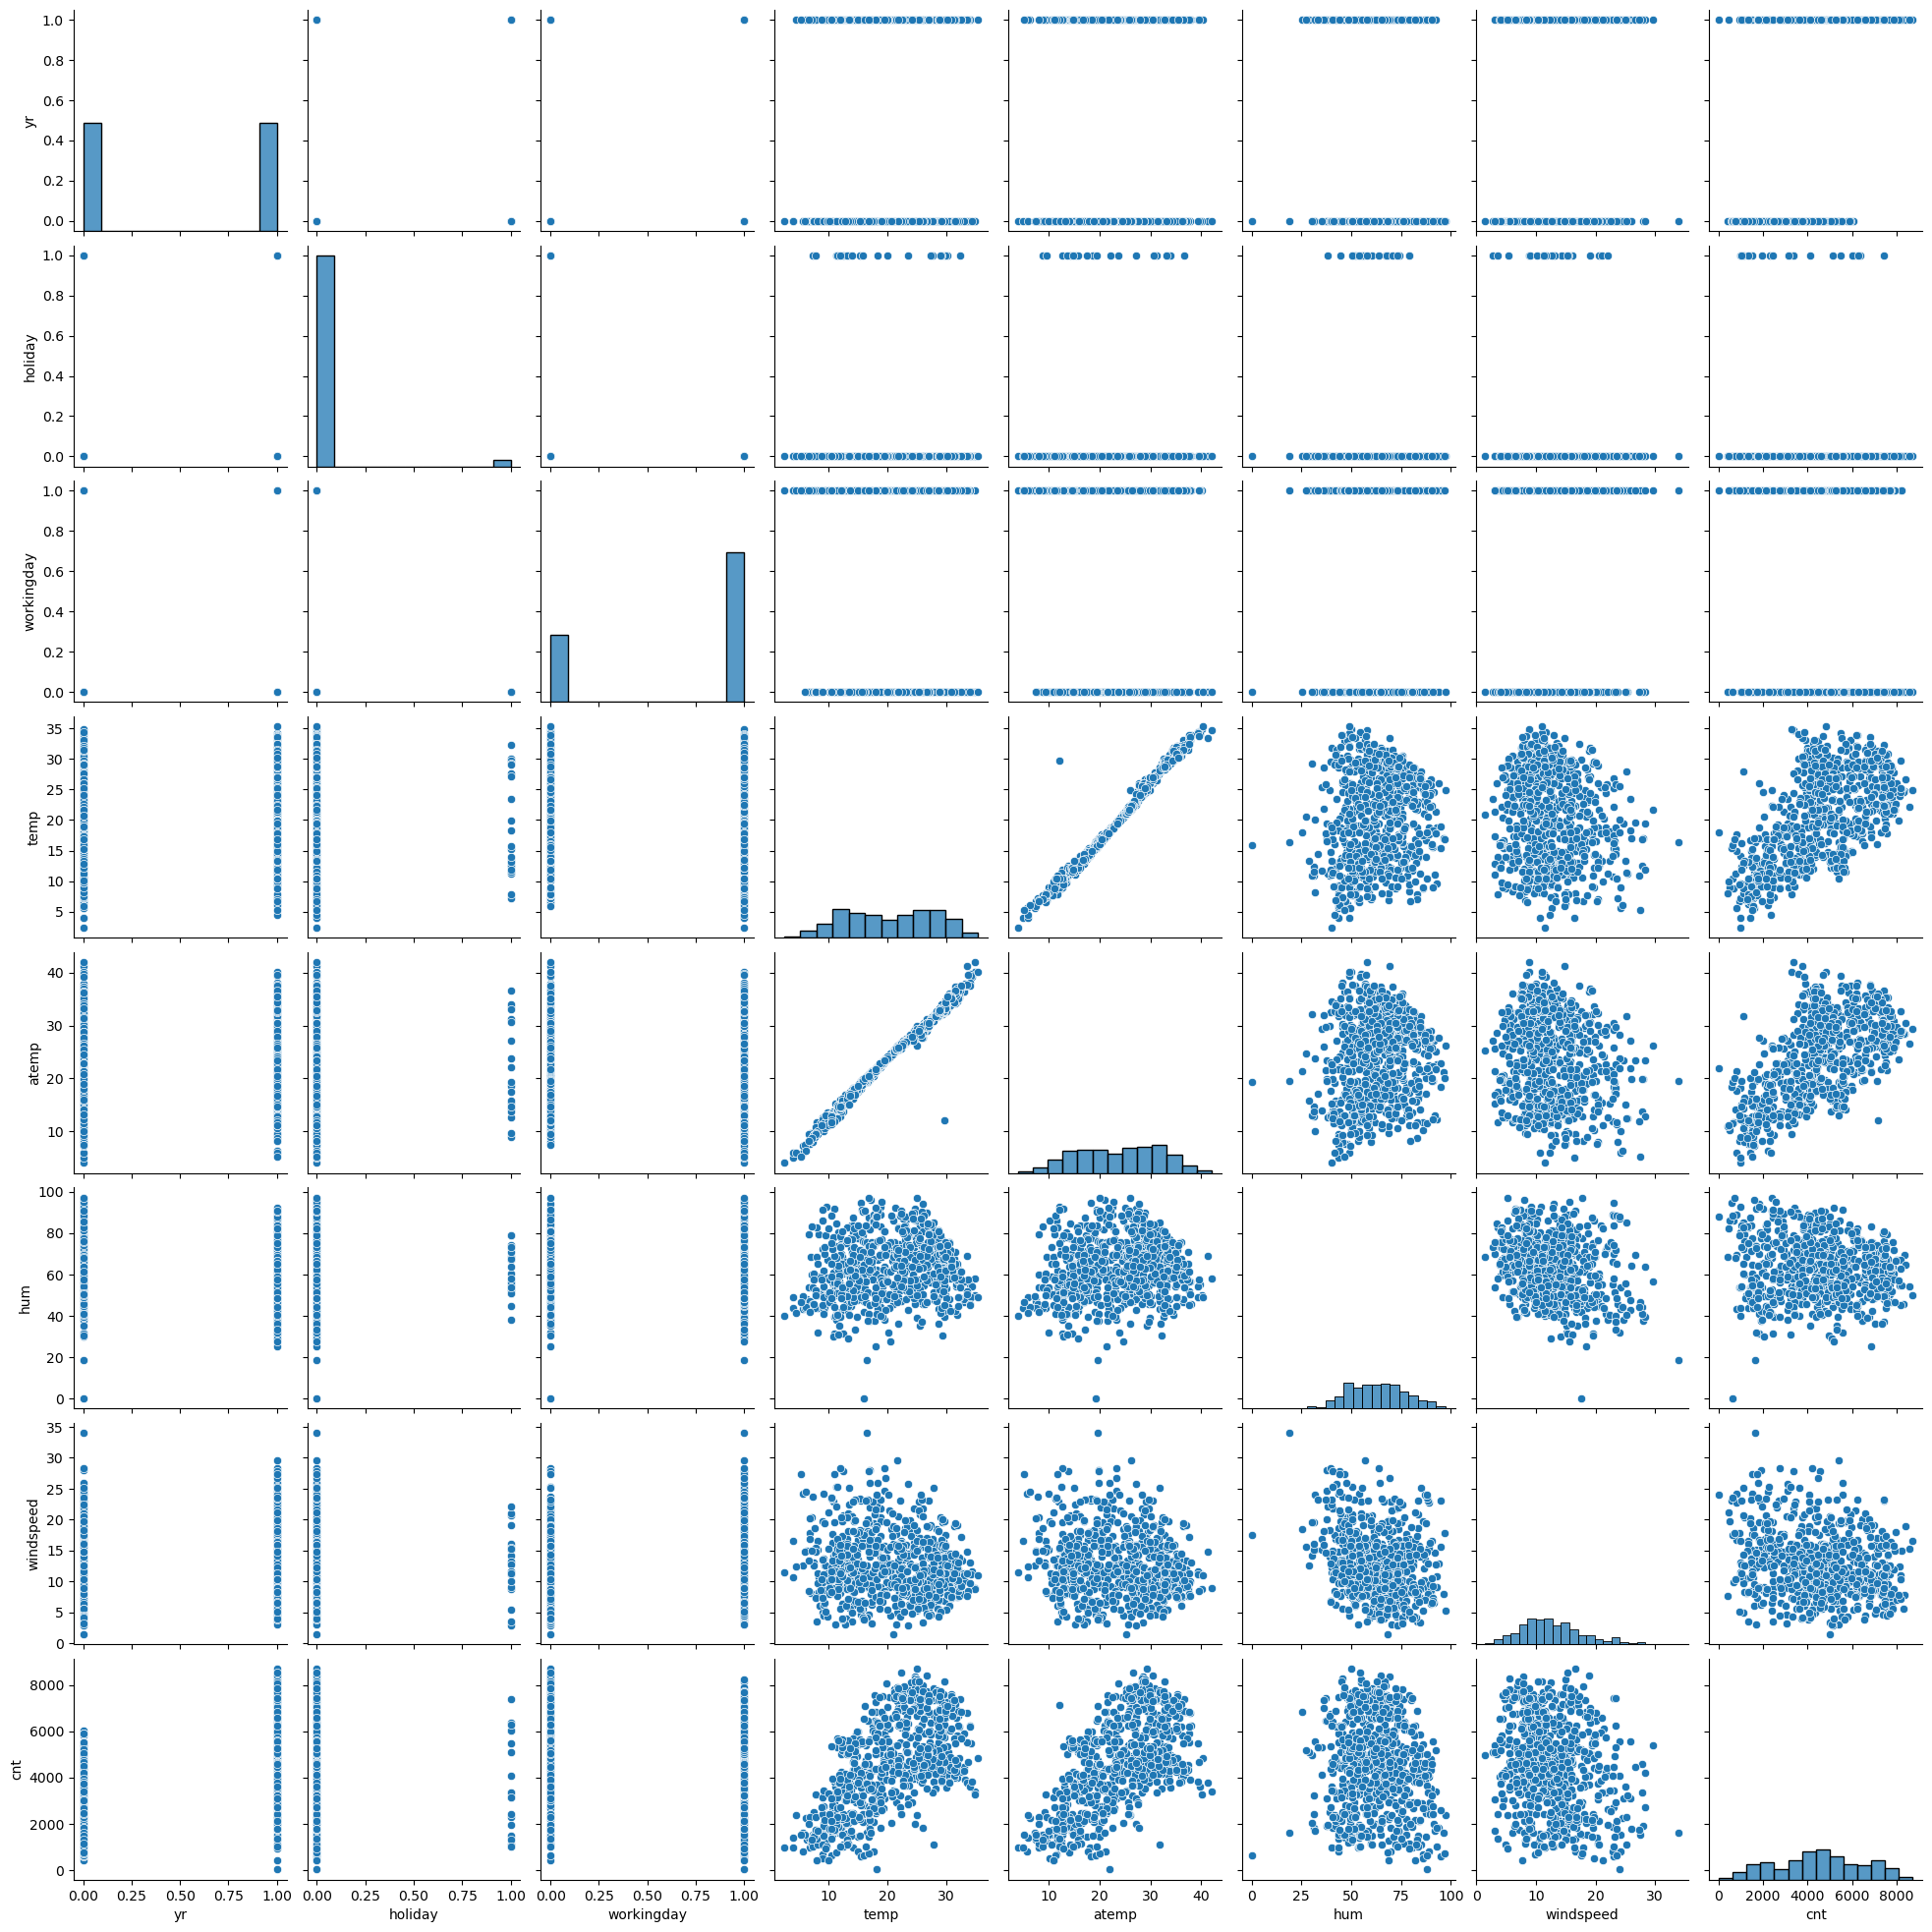

In [396]:
## Now, drawing pair plots to check Linear Relationship for Numerical variables 

plt.figure(figsize=(30,12))
sns.pairplot(day_df)
plt.show()

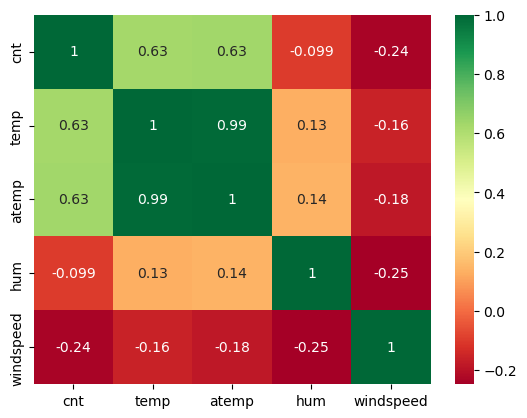

In [61]:
## Visualizing the correclation for Continous variables 

sns.heatmap(day_df[['cnt', 'temp', 'atemp', 'hum','windspeed']].corr(),cmap='RdYlGn',annot=True)
plt.show()

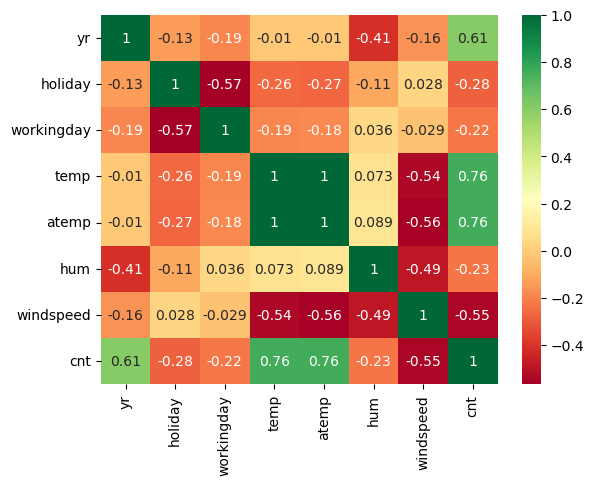

In [65]:
## Visualizing the correclation for Numerical variables


numeric_cols = day_df.select_dtypes(include=[np.number])
corr_num = numeric_cols.corr()
sns.heatmap(corr_num.corr(),cmap='RdYlGn',annot=True)
plt.show()

In [ ]:
## we can conclude from the Heatmap that the temp & atemp is higly correlated so we can remove any one but let us check 
## P-value * VIF value & then remove it 

In [ ]:
# let us plot regplot for Numerical Variables

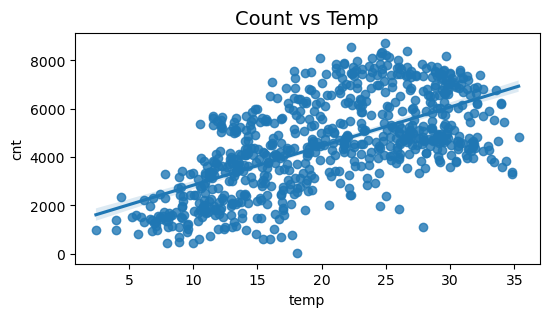

In [70]:
plt.figure(figsize=(6,3))
plt.title("Count vs Temp",fontsize=14)
sns.regplot(x="temp",y="cnt",data=day_df)
plt.show()

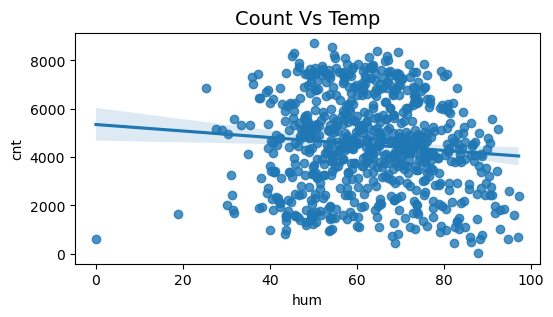

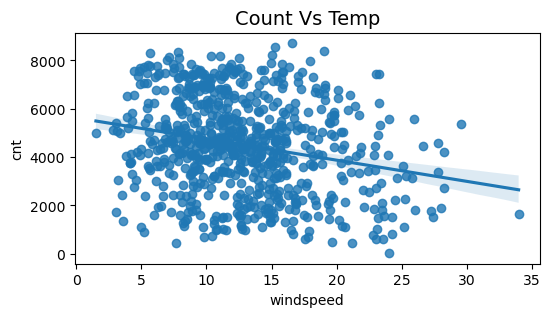

In [77]:

plt.figure(figsize=(6,3))
plt.title("Count Vs Temp",fontsize=14)
sns.regplot(x="hum",y="cnt",data=day_df)
plt.show()

plt.figure(figsize=(6,3))
plt.title("Count Vs Temp",fontsize=14)
sns.regplot(x="windspeed",y="cnt",data=day_df)
plt.show()

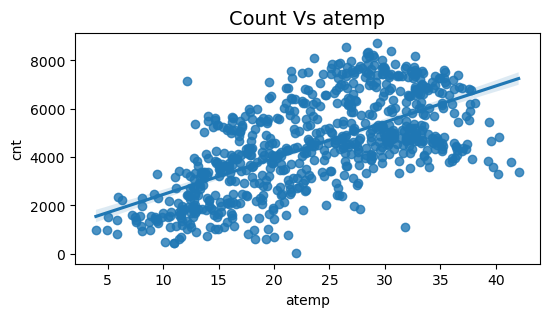

In [76]:
plt.figure(figsize=(6,3))
plt.title("Count Vs atemp",fontsize=14)
sns.regplot(x='atemp',y='cnt',data=day_df)
plt.show()

We can infer from the above plots that 

1. There is a very weak negative relationship between humidity and count. As humidity increases, there is a slight tendency for the count to decrease & the data points are broadly spread out across all levels of humidity, suggesting that other factors may play a more significant role in influencing the count.

2. Slightly there is a negative relationship between wind speed and count. As the wind speed increases, the count tends to decrease slightly.

3. Positive correlation between temperature and count. As the temperature increases, the count also tends to increase

## Data preparation

In [222]:
# Converting the data type objects 
day_cate=day_df.select_dtypes(include=['object'])

In [223]:
## Creating Dummies Variable

dummies_day = pd.get_dummies(day_cate, drop_first=True)
dummies_day=dummies_day.astype(int)

In [224]:
# Droping categorical variable columns
day_df = day_df.drop(list(day_cate.columns), axis=1)

In [225]:
# Concatenate dummy variables with the original dataframe
day_df = pd.concat([day_df, dummies_day], axis=1)

In [226]:
day_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,1,0


In [227]:
day_df.shape

(730, 30)

In [170]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   temp                 730 non-null    float64
 4   atemp                730 non-null    float64
 5   hum                  730 non-null    float64
 6   windspeed            730 non-null    float64
 7   cnt                  730 non-null    int64  
 8   season_spring        730 non-null    bool   
 9   season_summer        730 non-null    bool   
 10  season_winter        730 non-null    bool   
 11  mnth_aug             730 non-null    bool   
 12  mnth_dec             730 non-null    bool   
 13  mnth_feb             730 non-null    bool   
 14  mnth_jan             730 non-null    bool   
 15  mnth_july            730 non-null    boo

# Splitting the data into Train & Test Set

In [228]:
# Assigning y to predicted variable
y=day_df.pop('cnt')

#X will be independent variables
X=day_df

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [229]:
print(X_train.shape)
print(X_test.shape)

(510, 29)
(220, 29)


## Feature Scaling 

In [230]:
# Ensuring that all features are in same scale & Scaling on continous variables

conti_vars = ['temp','atemp','hum','windspeed']

scaler = MinMaxScaler()

# Performing Fit and transform on Train set
X_train[conti_vars] = scaler.fit_transform(X_train[conti_vars])

In [231]:
# Max value for train set is 1 & all values range in 0 to 1
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.625490,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.484471,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Model Creation (Hybrid Approach - RFE + Manual Elimination)

In [232]:
# 1. Building a linear Model by using Linear Regression

lr = LinearRegression()

lr.fit(X_train,y_train)

# limiting the features to count to 15
rfe = RFE(lr,n_features_to_select=15)
rfe.fit(X_train,y_train)



RFE(estimator=LinearRegression(), n_features_to_select=15)

In [233]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 10),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 2),
 ('mnth_jan', True, 1),
 ('mnth_july', True, 1),
 ('mnth_june', False, 12),
 ('mnth_mar', False, 15),
 ('mnth_may', False, 9),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 13),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', False, 5),
 ('weekday_sun', False, 6),
 ('weekday_thu', False, 14),
 ('weekday_tue', False, 7),
 ('weekday_wed', False, 11),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [315]:
# selecting the list of variable that are selected by RFE

col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_july',
       'mnth_nov', 'mnth_sep', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')


In [316]:
# Check the columns which are of highes ranking that are to be rejected 
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_aug', 'mnth_feb', 'mnth_june', 'mnth_mar',
       'mnth_may', 'mnth_oct', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [317]:
## The below function is used to calculate the VIF of columns
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))


In [318]:
# Selecting the columns which are done by RFE & then calculating VIF
X_train_rfe = X_train[col]


In [322]:
get_vif(X_train_rfe)

ValueError: Boolean array expected for the condition, not int64

## Build a Linear Model

In [325]:
# STEP 1: Select the columns which was selected by RFE
cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_july',
       'mnth_nov', 'mnth_sep', 'weathersit_good', 'weathersit_moderate'] 

X_train_sm = sm.add_constant(X_train[cols])
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())




                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          8.15e-189
Time:                        22:06:48   Log-Likelihood:                -4111.6
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     494   BIC:                             8323.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 658.1347    

In [321]:
get_vif(cols)

               Features    VIF
3                   hum  26.33
2                  temp  25.12
13      weathersit_good  15.65
14  weathersit_moderate   9.30
5         season_spring   5.75
4             windspeed   4.67
7         season_winter   4.53
6         season_summer   3.30
0                    yr   2.10
11             mnth_nov   1.91
9              mnth_jan   1.81
8              mnth_dec   1.62
10            mnth_july   1.60
12             mnth_sep   1.43
1               holiday   1.06


In [328]:
### STEP 2:Removing Humidity as it has high value
cols = ['yr', 'holiday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_july',
       'mnth_nov', 'mnth_sep', 'weathersit_good', 'weathersit_moderate'] 


X_train_sm = sm.add_constant(X_train[cols])
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          4.75e-186
Time:                        22:22:34   Log-Likelihood:                -4120.9
No. Observations:                 510   AIC:                             8272.
Df Residuals:                     495   BIC:                             8335.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -384.0913    

In [329]:
get_vif(cols)

               Features    VIF
12      weathersit_good  15.65
2                  temp  14.02
13  weathersit_moderate   8.82
3             windspeed   4.66
4         season_spring   4.41
6         season_winter   3.36
5         season_summer   2.78
0                    yr   2.08
10             mnth_nov   1.89
8              mnth_jan   1.74
9             mnth_july   1.60
7              mnth_dec   1.56
11             mnth_sep   1.37
1               holiday   1.06


In [330]:
### STEP 3: Removing mnth_nov  as it has high value
cols = ['yr', 'holiday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_july',
        'mnth_sep', 'weathersit_good', 'weathersit_moderate'] 


X_train_sm = sm.add_constant(X_train[cols])
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          2.74e-186
Time:                        22:30:40   Log-Likelihood:                -4123.1
No. Observations:                 510   AIC:                             8274.
Df Residuals:                     496   BIC:                             8334.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -495.6691    

In [331]:
get_vif(cols)

               Features    VIF
11      weathersit_good  14.97
2                  temp  13.41
12  weathersit_moderate   8.50
3             windspeed   4.63
4         season_spring   4.35
6         season_winter   2.76
5         season_summer   2.74
0                    yr   2.08
8              mnth_jan   1.72
9             mnth_july   1.60
10             mnth_sep   1.35
7              mnth_dec   1.33
1               holiday   1.04


In [332]:
### STEP 4: Removing mnth_dec  as it has high value
cols = ['yr', 'holiday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_july',
        'mnth_sep', 'weathersit_good', 'weathersit_moderate'] 


X_train_sm = sm.add_constant(X_train[cols])
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          8.14e-187
Time:                        22:34:13   Log-Likelihood:                -4124.6
No. Observations:                 510   AIC:                             8275.
Df Residuals:                     497   BIC:                             8330.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -586.7309    

In [333]:
get_vif(cols)

               Features    VIF
10      weathersit_good  14.45
2                  temp  13.01
11  weathersit_moderate   8.21
3             windspeed   4.62
4         season_spring   4.33
5         season_summer   2.74
6         season_winter   2.65
0                    yr   2.08
7              mnth_jan   1.66
8             mnth_july   1.59
9              mnth_sep   1.35
1               holiday   1.04


In [334]:
### STEP 5: Removing mnth_jan  as it has high value
cols = ['yr', 'holiday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_july',
        'mnth_sep', 'weathersit_good', 'weathersit_moderate'] 


X_train_sm = sm.add_constant(X_train[cols])
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          5.06e-187
Time:                        22:36:13   Log-Likelihood:                -4127.0
No. Observations:                 510   AIC:                             8278.
Df Residuals:                     498   BIC:                             8329.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -714.7821    

In [335]:
get_vif(cols)

               Features    VIF
9       weathersit_good  14.02
2                  temp  12.55
10  weathersit_moderate   7.91
3             windspeed   4.59
4         season_spring   3.98
5         season_summer   2.74
6         season_winter   2.64
0                    yr   2.07
7             mnth_july   1.59
8              mnth_sep   1.35
1               holiday   1.04


In [352]:
### STEP 6: Removing mnth_july  as it has high value
cols = ['yr', 'holiday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter',
        'mnth_sep', 'weathersit_good', 'weathersit_moderate'] 


X_train_sm = sm.add_constant(X_train[cols])
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          1.47e-186
Time:                        23:06:45   Log-Likelihood:                -4130.9
No. Observations:                 510   AIC:                             8284.
Df Residuals:                     499   BIC:                             8330.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -796.5848    

### Inferences:

1. from the above model we can infer that all variables p-value is almost to zero & even the VIF is accepted which is below <5 & also the r2 and Adjusted r2 is 0.833, 0.829 respectively. Hence we can conclude that the model is significant 

## Residual Analysis 

In [349]:
y_train_pred = lm.predict(X_train_sm)

Text(0.5, 0, 'Errors')

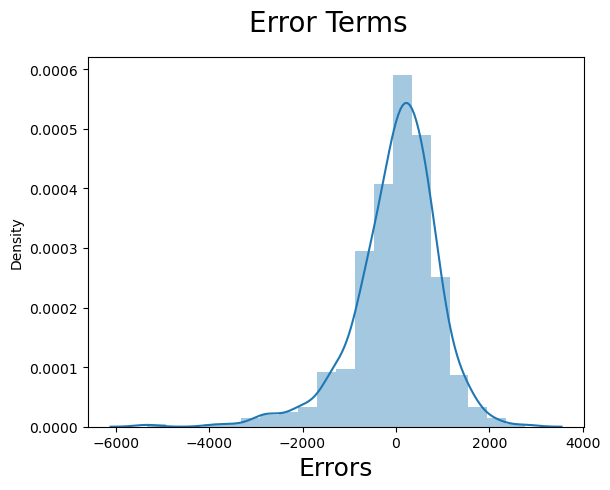

In [351]:
### Checking the Error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

### As we can see from the plot that the mean=0 which means that it is a normal distribution

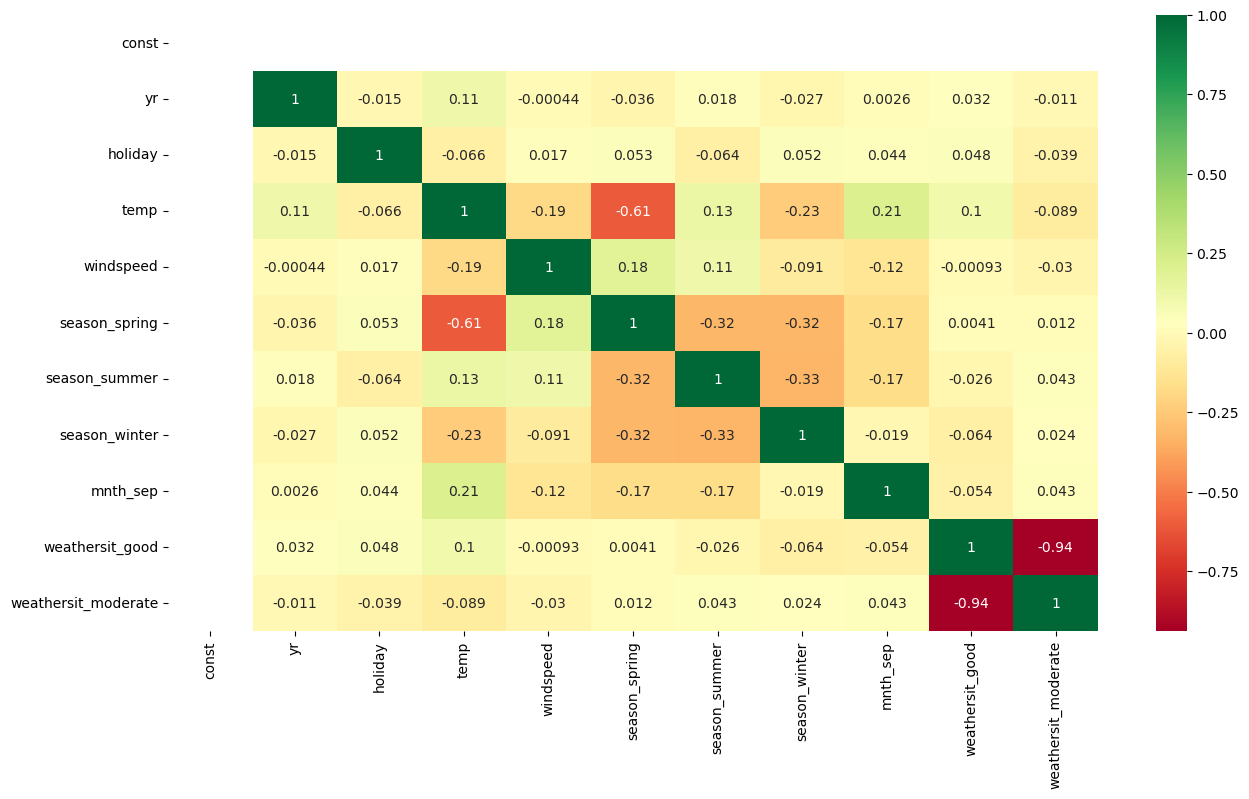

In [356]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_sm.corr(),annot = True, cmap="RdYlGn")
plt.show()

In [379]:
### Now lets perform for Test set 

num_vars = ['temp','atemp','hum','windspeed']

In [380]:
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [383]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
184,0,1,0,-0.075150,-0.105984,0.000070,-0.093777,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,-0.075086,-0.105934,0.000065,-0.093706,0,1,0,...,0,0,0,0,0,1,0,0,1,0
299,0,0,0,-0.075446,-0.106172,0.000089,-0.093520,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,-0.075104,-0.105966,0.000046,-0.093514,0,0,0,...,0,0,0,0,0,0,0,0,1,0
152,0,0,0,-0.075164,-0.106003,0.000033,-0.093311,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [384]:
X_test_rfe = X_test[cols]

In [385]:
# Add a constant to the test set created
X_test_rfe = sm.add_constant(X_test_rfe)
X_test_rfe.info()
y_pred = lm.predict(X_test_rfe)

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 184 to 653
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   const                220 non-null    float64
 1   yr                   220 non-null    int64  
 2   holiday              220 non-null    int64  
 3   temp                 220 non-null    float64
 4   windspeed            220 non-null    float64
 5   season_spring        220 non-null    int64  
 6   season_summer        220 non-null    int64  
 7   season_winter        220 non-null    int64  
 8   mnth_sep             220 non-null    int64  
 9   weathersit_good      220 non-null    int64  
 10  weathersit_moderate  220 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 20.6 KB


In [389]:
### Computing r2 score
r2_score(y_train,y_train_pred)

0.7870537940791509

Inferences:
    
We can conclude that there is huge demand for
 'yr',
 'holiday',
 'temp',
 'windspeed',
 'season_spring',
 'season_summer',
 'season_winter',
 'mnth_sep',
 'weathersit_good',
 'weathersit_moderate'

So company can focus on the above list to incease the profits